In [ ]:
!pip install scaleogram

In [ ]:
# Importing python libraries

import pandas as pd               # For Dataframe operations
import numpy as np                # For array calcualtion
import matplotlib.pyplot as plt   # For plotting purpose
import math                       # for flooring floats
import pywt                       # For wavelet transform
import scaleogram as scg          # For wavelet transform
import os                         # For storing images
from PIL import Image             # For reading CWT images

In [ ]:
# Mounting gdrive to read dataset

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Reading the dataset into pandas dataframe

df_data = pd.read_csv("/content/drive/path_to_data.csv", index_col=0)

df_data.head(5)         # Printing first 5 values of dataset

,Time (ms),Membrane Potential (mV)
0,0.00,-66.481339
1,0.02,-66.856187
2,0.04,-66.637526
3,0.06,-66.731238
4,0.08,-67.012373


Few Observations about the dataset:

1.   As the sampling frequency is 50KHz. We can see that each sample is acquired at a gap of 0.02 ms.
2.   The whole data is recorded for a time-span of 1.2 s (approx).





In [ ]:
print("Shape of data set:", df_data.shape)

Shape of data set: (59750, 2)


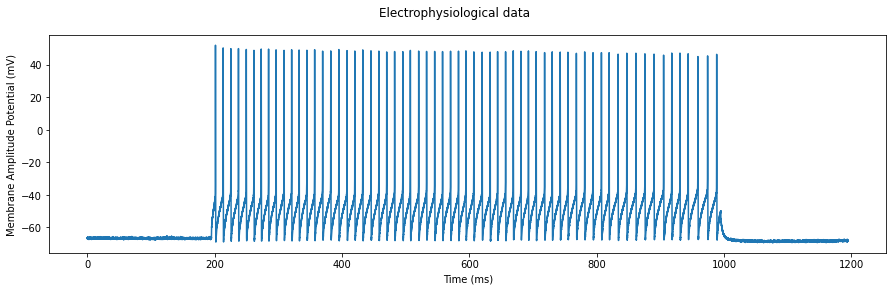

In [ ]:
# Plot of the overall dataset

fig,ax = plt.subplots(figsize=(15,4))
plt.plot(df_data["Time (ms)"], df_data["Membrane Potential (mV)"])
plt.ylabel("Membrane Amplitude Potential (mV)")
plt.xlabel("Time (ms)")
plt.suptitle("Electrophysiological data")
plt.show()

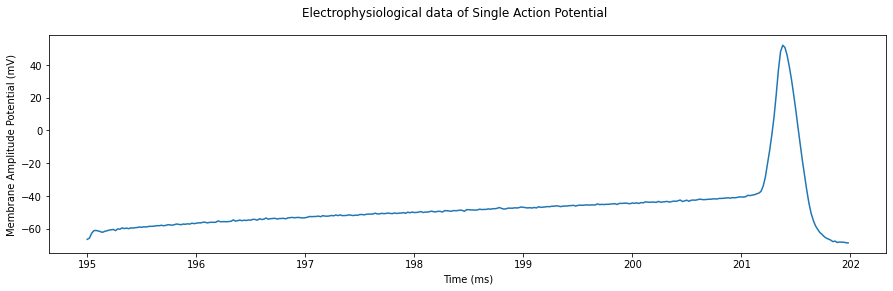

In [ ]:
# Plot of the overall dataset

a=9750
b=10100

fig,ax = plt.subplots(figsize=(15,4))
plt.plot(df_data["Time (ms)"][a:b], df_data["Membrane Potential (mV)"][a:b])
plt.ylabel("Membrane Amplitude Potential (mV)")
plt.xlabel("Time (ms)")
plt.suptitle("Electrophysiological data of Single Action Potential")
plt.show()

Observation:

1. Depolarizing step is started from 200ms and ended at 1000ms.

2. We can see that the a single action Potential rises from -65mV and reaches a peak of 45mV(approx) and comes bact to -65mV

3. This cycle took 600 samples of reading i.e. 350*0.02ms = 7 ms

# Method 2 to detect Action Potential: Uning Continuous wavelet transform (CWT)
1. Action Potential is an event which is triggered when the membrane potential reaches the threshold value. Once reached, it rise to a significant value(often 40mV-50mV) with a spike and end up coming back to the resting potential of -65mV.

2. We can detect the number of Action Potential events automatically if we can check how many times a horizontal line crosses (at a level of 0-20mv value) the membrane Potential curve.
3. Continuous Wavelet transform is an operation to convert a Amplitude vs Time data into a 3D data which covers the essence of time as well as the frequency domain of the data.

4. It convolves the time-series data with the mother-wavelet at differnt scales. The differnt scale wavelet is translated accross the time-domain to calculate the convolution product.

5. CWT of action potential data differs from the other potential sections of the time-series data. We can use this differnce to detect the action potential in the time-series data.


In [ ]:
# choose default wavelet function for the entire notebook
scg.set_default_wavelet('cmor1-1.5')
scales = scg.periods2scales( np.arange(1, 100) )

### CWT for Action Potential

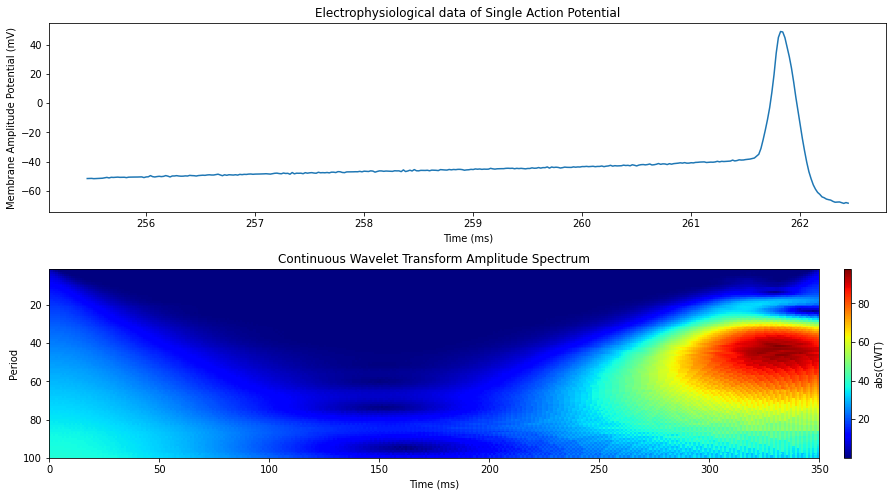

In [ ]:
a=math.floor(elicit_index[5])-315   # manually caliberated. plot from 315 samples back
b=a+350                             # manually caliberated. plot for next 350 samples. 
                                    # We saw earlier each action potential take 350 samples normally.

fig,ax = plt.subplots(2,1,figsize=(15,8))
ax[0].plot(df_data["Time (ms)"][a:b], df_data["Membrane Potential (mV)"][a:b])
scg.cws(df_data["Membrane Potential (mV)"][a:b].values, scales=scales, figsize=(6.5,5), coi=False, ax=ax[1])

### Styling
ax[0].set_ylabel("Membrane Amplitude Potential (mV)")
ax[0].set_xlabel("Time (ms)")
ax[1].set_ylabel("Period")
ax[1].set_xlabel("Time (ms)")
ax[0].set_title("Electrophysiological data of Single Action Potential")
plt.subplots_adjust(hspace=0.3)

plt.show()

CWT for Non Action Potential section

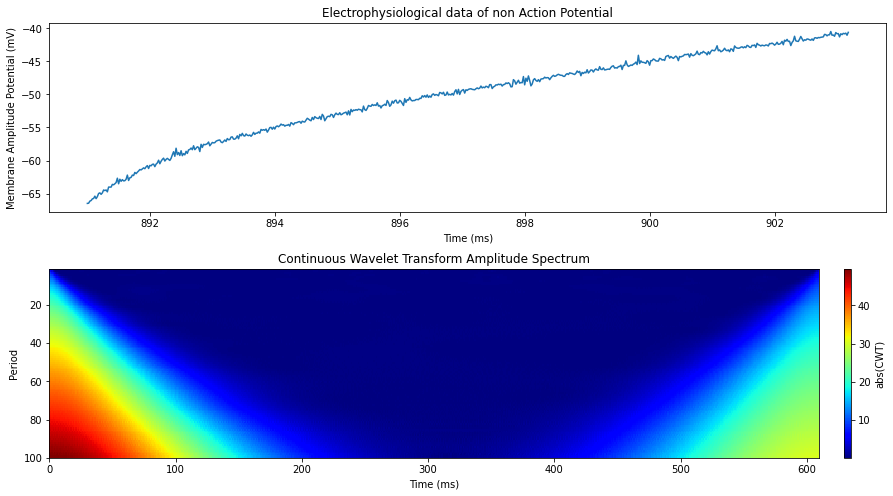

In [ ]:
a=45160-610
b=45160

fig,ax = plt.subplots(2,1,figsize=(15,8))
ax[0].plot(df_data["Time (ms)"][a:b], df_data["Membrane Potential (mV)"][a:b])
scg.cws(df_data["Membrane Potential (mV)"][a:b].values, scales=scales, figsize=(6.5,5), coi=False, ax=ax[1])

### Styling
ax[0].set_ylabel("Membrane Amplitude Potential (mV)")
ax[0].set_xlabel("Time (ms)")
ax[1].set_ylabel("Period")
ax[1].set_xlabel("Time (ms)")
ax[0].set_title("Electrophysiological data of non Action Potential")
plt.subplots_adjust(hspace=0.3)

plt.show()

# CWT for Non Action Potential section normalize for cbar limit range [50-70]

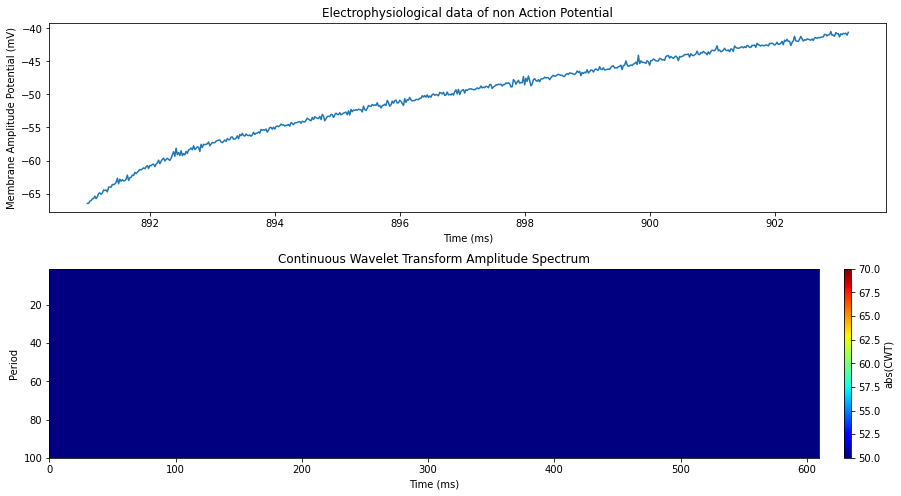

In [ ]:
a=45160-610
b=45160

fig,ax = plt.subplots(2,1,figsize=(15,8))
ax[0].plot(df_data["Time (ms)"][a:b], df_data["Membrane Potential (mV)"][a:b])
scg.cws(df_data["Membrane Potential (mV)"][a:b].values, scales=scales, figsize=(6.5,5), coi=False, ax=ax[1], clim=[50,70]) ### 

### Styling
ax[0].set_ylabel("Membrane Amplitude Potential (mV)")
ax[0].set_xlabel("Time (ms)")
ax[1].set_ylabel("Period")
ax[1].set_xlabel("Time (ms)")
ax[0].set_title("Electrophysiological data of non Action Potential")
plt.subplots_adjust(hspace=0.3)

plt.show()

# Observation:

1. We can see that CWT for non-credential is simply blue colour when we limit the colour of plot to [50-70].

2. While CWT of action potential section is containing various colour. Here colour represents the Amplitude of the convolution.

In [ ]:
# Let's create CWT images for the whole series with a window of 610 samples.

def cwt(a,b,counter, file_dir):

  a=a
  b=b

  fig, ax = plt.subplots()

  scales = scg.periods2scales( np.arange(1, 100) )
  scg.cws(df_data["Membrane Potential (mV)"][a:b].values, scales=scales, figsize=(6.5,5), coi=False, ax=ax, clim=[50,85], cbar=False)

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.title("")

  file_name = file_dir+str(counter)+".png"
  plt.savefig(file_name)
  plt.close()

In [ ]:
counter = 0     # For assigning image names
a=0             # Window starting index
b=a+610         # Window ending index

dir_loc = "/content/CWT_Image/"

while(b<df_data.shape[0]):
  b = a+610
  cwt(a,b, counter, dir_loc)
  counter += 1
  a = b

print("Done!")
print("Total images produced :", counter)

Done!
Total images produced : 98


In [ ]:
def load_image_in_array(window_number):
  # load the image
  file_name = "/content/CWT_Image/"+str(window_number)+".png"
  image = Image.open(file_name)
  # convert image to numpy array
  data = np.asarray(image)
  return data

In [ ]:
# Let's check the number of elicit Action Potential

#counter = 98 # TOTAL NO OF IMAGES created
threshold_active_count = 0
count = 0
activation_index = []
non_activation_index = []

#ref_non_threshold_active_img_arr = load_image_in_array(count)

for i in range(counter):
  curr_image_arr = load_image_in_array(i)
  # if((curr_image_arr != ref_non_threshold_active_img_arr).any()):
  if(len(np.unique(curr_image_arr)) > 35):      # Check number of unique colours are more than 35
    count += 1
    activation_index.append(i)
  else:
    non_activation_index.append(i)
  

print("Total Number of Threshold Activation elicit:", count)

Total Number of Threshold Activation elicit: 63


### Obesrvation:

1. We can see that total number of elicit in Action Potential is 63 which is same as found from Method 1. 


Few Plots of both classes: Action Potential and Non-Action Potential

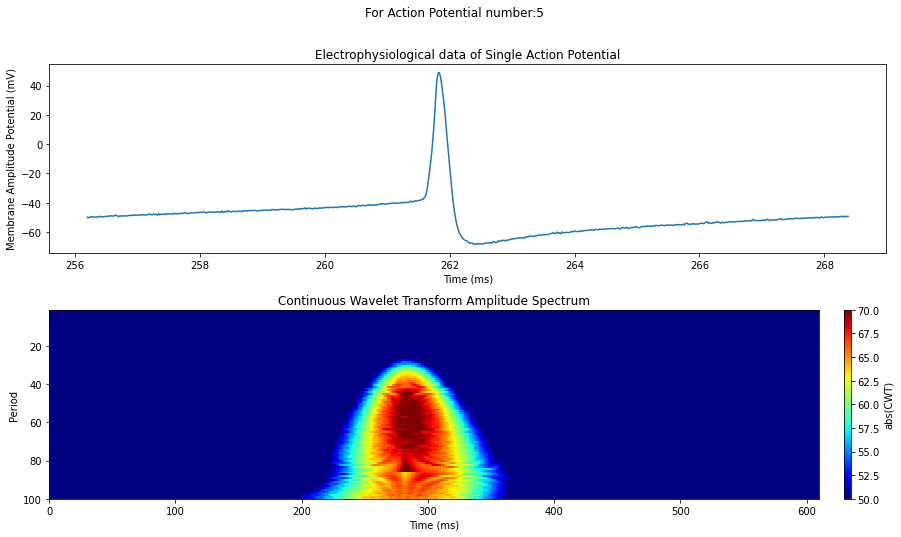

In [ ]:
action_potention_num = 5            # Pick any action Potential index out of 63.

a=activation_index[action_potention_num]*610           # Multiply with 610 i.e. window size
b=a+610                             # plot for next 610 samples. Manually choosen window size

fig,ax = plt.subplots(2,1,figsize=(15,8))
ax[0].plot(df_data["Time (ms)"][a:b], df_data["Membrane Potential (mV)"][a:b])
scg.cws(df_data["Membrane Potential (mV)"][a:b].values, scales=scales, figsize=(6.5,5), coi=False, ax=ax[1],clim=[50,70])

### Styling
ax[0].set_ylabel("Membrane Amplitude Potential (mV)")
ax[0].set_xlabel("Time (ms)")
ax[1].set_ylabel("Period")
ax[1].set_xlabel("Time (ms)")
ax[0].set_title("Electrophysiological data of Single Action Potential")
plt.subplots_adjust(hspace=0.3)

plt.suptitle("For Action Potential number:"+ str(action_potention_num))

plt.show()

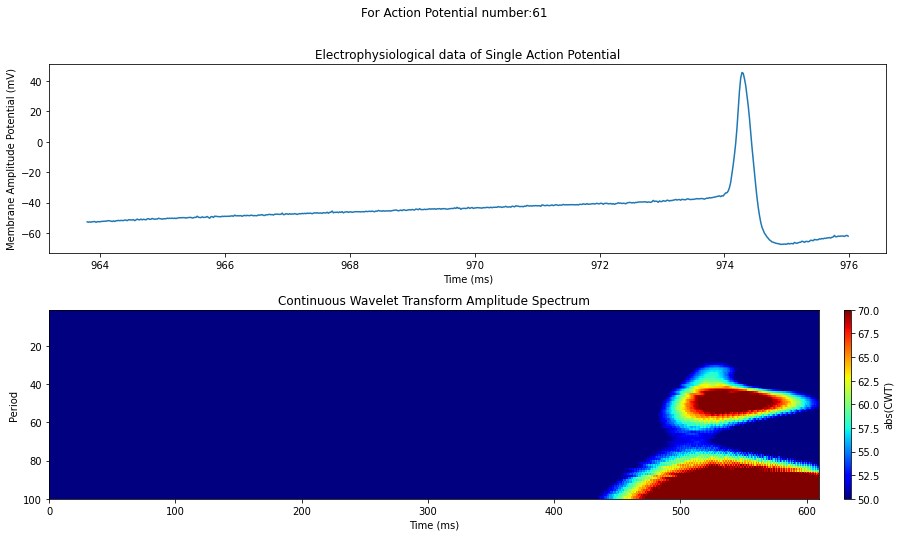

In [ ]:
action_potention_num = 61            # Pick any action Potential index out of 63.

a=activation_index[action_potention_num]*610           # Multiply with 610 i.e. window size
b=a+610                             # plot for next 610 samples. Manually choosen window size

fig,ax = plt.subplots(2,1,figsize=(15,8))
ax[0].plot(df_data["Time (ms)"][a:b], df_data["Membrane Potential (mV)"][a:b])
scg.cws(df_data["Membrane Potential (mV)"][a:b].values, scales=scales, figsize=(6.5,5), coi=False, ax=ax[1],clim=[50,70])

### Styling
ax[0].set_ylabel("Membrane Amplitude Potential (mV)")
ax[0].set_xlabel("Time (ms)")
ax[1].set_ylabel("Period")
ax[1].set_xlabel("Time (ms)")
ax[0].set_title("Electrophysiological data of Single Action Potential")
plt.subplots_adjust(hspace=0.3)

plt.suptitle("For Action Potential number:"+ str(action_potention_num))

plt.show()

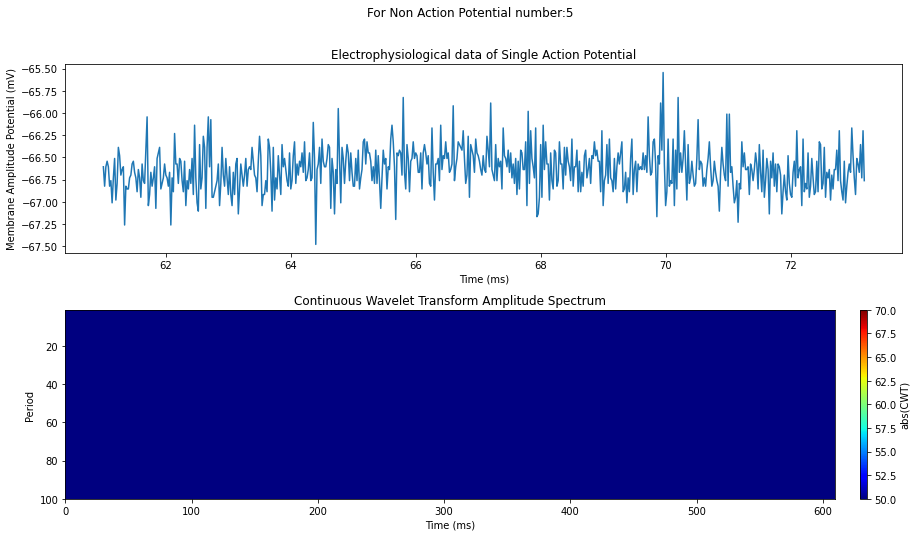

In [ ]:
non_action_potention_num = 5            # Pick any non action Potential index out of 35.

a=non_activation_index[non_action_potention_num]*610           # Multiply with 610 i.e. window size
b=a+610                                                        # plot for next 610 samples. Manually choosen window size

fig,ax = plt.subplots(2,1,figsize=(15,8))
ax[0].plot(df_data["Time (ms)"][a:b], df_data["Membrane Potential (mV)"][a:b])
scg.cws(df_data["Membrane Potential (mV)"][a:b].values, scales=scales, figsize=(6.5,5), coi=False, ax=ax[1], clim=[50,70])

### Styling
ax[0].set_ylabel("Membrane Amplitude Potential (mV)")
ax[0].set_xlabel("Time (ms)")
ax[1].set_ylabel("Period")
ax[1].set_xlabel("Time (ms)")
ax[0].set_title("Electrophysiological data of Single Action Potential")
plt.subplots_adjust(hspace=0.3)

plt.suptitle("For Non Action Potential number:"+ str(non_action_potention_num))

plt.show()

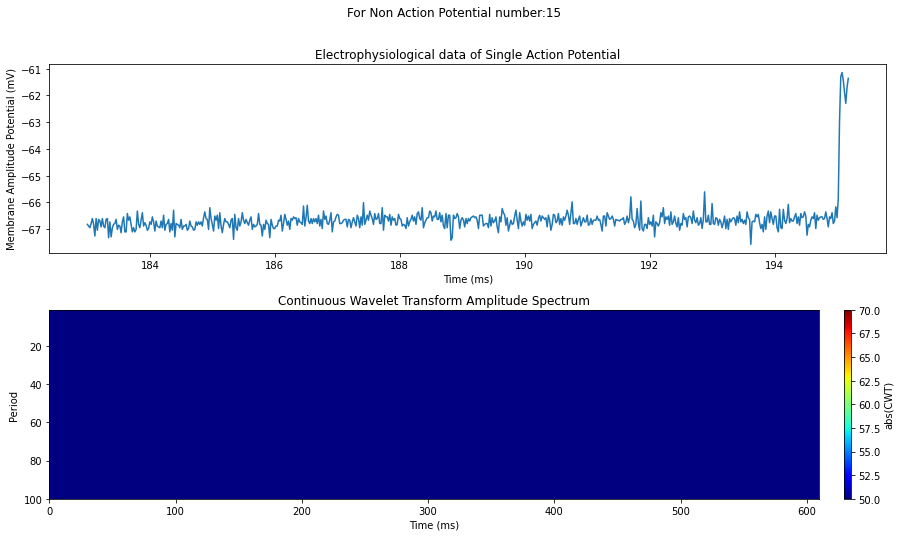

In [ ]:
non_action_potention_num = 15            # Pick any non action Potential index out of 35.

a=non_activation_index[non_action_potention_num]*610           # Multiply with 610 i.e. window size
b=a+610                                                        # plot for next 610 samples. Manually choosen window size

fig,ax = plt.subplots(2,1,figsize=(15,8))
ax[0].plot(df_data["Time (ms)"][a:b], df_data["Membrane Potential (mV)"][a:b])
scg.cws(df_data["Membrane Potential (mV)"][a:b].values, scales=scales, figsize=(6.5,5), coi=False, ax=ax[1], clim=[50,70])

### Styling
ax[0].set_ylabel("Membrane Amplitude Potential (mV)")
ax[0].set_xlabel("Time (ms)")
ax[1].set_ylabel("Period")
ax[1].set_xlabel("Time (ms)")
ax[0].set_title("Electrophysiological data of Single Action Potential")
plt.subplots_adjust(hspace=0.3)

plt.suptitle("For Non Action Potential number:"+ str(non_action_potention_num))

plt.show()